# Prep Notebook 5
## The Simpsons and Bicycles I

This notebook has a few exercises that can serve as a primer for what to expect in the `Problem Session 5` notebook. These exercises will touch upon the basic python, `pandas`, `numpy`, `matplotlib` and some supervised learning basic techniques that you may want a refresher on prior to starting `Problem Session 5`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

##### 1. `.loc`, `.iloc`, `.copy()` and `.drop`

Load the data stored in `goog_trend_pumpkin.csv` in the `Data` folder into a variable called `pumpkin`.

- Look at the last five observations.
- Store the last 12 observations in a new variable, call it `pumpkin_test`
- Using `.drop` store every other observation in a new variable called `pumpkin_train`.

##### Sample Solution

In [2]:
pumpkin = pd.read_csv("../../Data/goog_trend_pumpkin.csv")

In [3]:
pumpkin.tail()

,Month,pumpkin_trend,lag_5_value
215,2021-12,9,NaN
216,2022-01,5,NaN
217,2022-02,4,NaN
218,2022-03,4,NaN
219,2022-04,4,NaN


In [4]:
pumpkin_test = pumpkin.tail(12).copy()


## or

pumpkin_test = pumpkin.iloc[-12:].copy()

In [5]:
pumpkin_train = pumpkin.drop(pumpkin_test.index).copy()

##### 2. Another plot

Plot the `pumpkin_trend` column of `pumpkin_train` against a `range` object that is the length of `pumpkin_train`.

##### Sample Solution

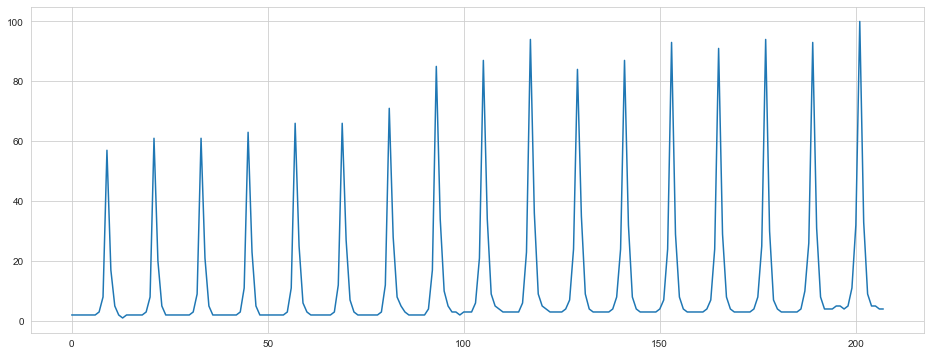

In [6]:
plt.figure(figsize=(16,6))

plt.plot(range(len(pumpkin_train)),
               pumpkin_train.pumpkin_trend)

plt.show()

##### 3. `.mean()`

Using solely `pandas` find the arithmetic mean of the `pumpkin_trend` column in `pumpkin_train`.

##### Sample Solution

In [7]:
pumpkin_train.pumpkin_trend.mean()

13.08173076923077

##### 4. Correlation

Using `pandas` `.corr`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html</a>, find the correlation between the `pumpkin_trend` and `lag_5_value` columns of `pumpkin_train`.

##### Sample Solution

In [8]:
pumpkin_train.corr().iloc[0,1]

-0.2240577311330689

##### 5. Fit a simple linear regression

Fit a simple linear regression model regressing `pumpkin_trend` on the array from `0` to `len(pumpkin_train)-1`.

##### Sample Solution

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
slr = LinearRegression()

slr.fit(np.arange(len(pumpkin_train)).reshape(-1,1), 
            pumpkin_train.pumpkin_trend.values)

LinearRegression()

##### 6. MSE

Find the mean squared error of the model you just fit.

##### Sample Solution

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
mean_squared_error(pumpkin_train.pumpkin_trend.values, slr.predict(np.arange(len(pumpkin_train)).reshape(-1,1)))

467.92536610207765

##### 7. `.apply`

Below is a function that checks if a number is even. Use `.apply`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html</a>, to check which rows of `pumpkin_trend` are even.

<i>Note that this function only works on integers</i>.

##### Sample Solution

In [13]:
def is_even(n):
    if n%2 == 0:
        return True
    else:
        return False

In [14]:
pumpkin_train['pumpkin_trend'].apply(is_even)

0       True
1       True
2       True
3       True
4       True
       ...  
203    False
204    False
205    False
206     True
207     True
Name: pumpkin_trend, Length: 208, dtype: bool

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)